## 🚀 Program 3

### 📋 Objective

##### Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample. 

In [9]:
!pip install pandas scikit-learn matplotlib
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [10]:
# Step 1: Load dataset
data = pd.read_csv("tennis.csv")
print("Dataset:\n", data)

Dataset:
      Outlook Temperature Humidity    Wind PlayTennis
0      Sunny         Hot     High    Weak         No
1      Sunny         Hot     High  Strong         No
2   Overcast         Hot     High    Weak        Yes
3       Rain        Mild     High    Weak        Yes
4       Rain        Cool   Normal    Weak        Yes
5       Rain        Cool   Normal  Strong         No
6   Overcast        Cool   Normal  Strong        Yes
7      Sunny        Mild     High    Weak         No
8      Sunny        Cool   Normal    Weak        Yes
9       Rain        Mild   Normal    Weak        Yes
10     Sunny        Mild   Normal  Strong        Yes
11  Overcast        Mild     High  Strong        Yes
12  Overcast         Hot   Normal    Weak        Yes
13      Rain        Mild     High  Strong         No


In [11]:
# Step 2: Separate features and target
X = data.drop('PlayTennis', axis=1)
y = data['PlayTennis']

In [12]:
# Step 3: Encode categorical columns using individual encoders
encoders = {}
X_encoded = pd.DataFrame()
for column in X.columns:
    le = LabelEncoder()
    X_encoded[column] = le.fit_transform(X[column])
    encoders[column] = le  # Store encoder

target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

In [13]:
# Step 4: Train Decision Tree using ID3 (entropy)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_encoded, y_encoded)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


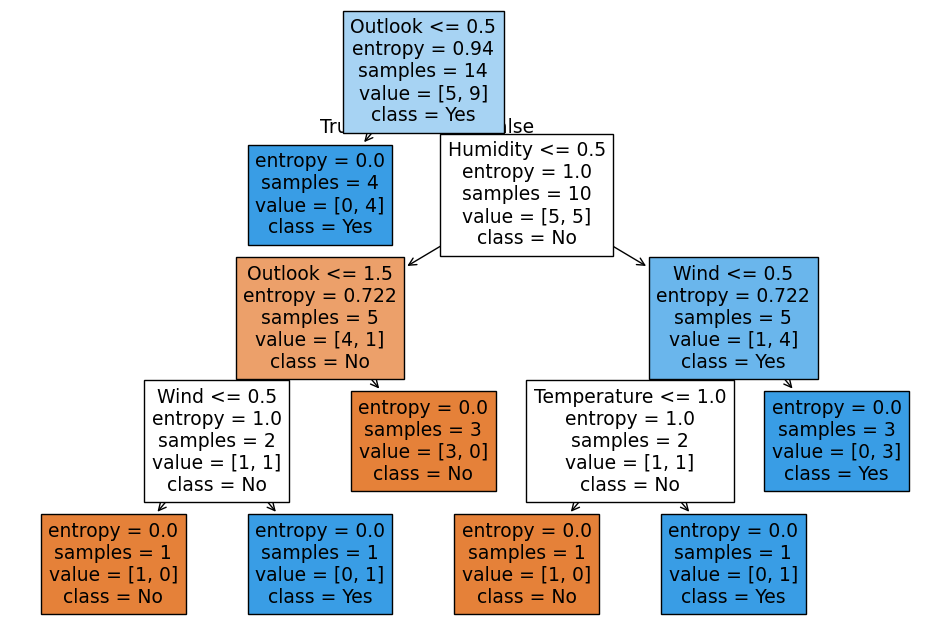

In [14]:
# Step 5: Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=target_encoder.classes_, filled=True)
plt.show()

In [15]:
# Step 6: Classify a new sample
sample = pd.DataFrame([['Sunny', 'Cool', 'High', 'Strong']], columns=X.columns)

In [16]:
# Encode new sample using the same encoders
sample_encoded = pd.DataFrame()
for column in sample.columns:
    le = encoders[column]
    sample_encoded[column] = le.transform(sample[column])

# Predict and decode the result
prediction = clf.predict(sample_encoded)
result = target_encoder.inverse_transform(prediction)

print("Prediction for sample", sample.values[0], "=>", result[0])

Prediction for sample ['Sunny' 'Cool' 'High' 'Strong'] => No
